In [1]:
# pip install shap

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score
import shap
import matplotlib.pyplot as plt


In [3]:

# Step 1: Generate a more complex dataset
np.random.seed(42)
n_customers = 10000

data = {
    "CustomerID": range(1, n_customers + 1),
    "Age": np.random.randint(18, 80, n_customers),
    "Gender": np.random.choice(["Male", "Female"], n_customers),
    "Tenure": np.random.randint(0, 72, n_customers),
    "MonthlyCharges": np.round(np.random.uniform(20, 120, n_customers), 2),
    "TotalCharges": lambda x: x["MonthlyCharges"] * x["Tenure"],
    "PaymentMethod": np.random.choice(
        ["Credit Card", "Debit Card", "PayPal", "Bank Transfer"], n_customers
    ),
    "ContractType": np.random.choice(
        ["Month-to-month", "One year", "Two years"], n_customers
    ),
    "InternetService": np.random.choice(
        ["Fiber optic", "DSL", "None"], n_customers
    ),
    "SupportTicketsRaised": np.random.randint(0, 10, n_customers),
    "ServiceUsageHours": np.round(np.random.uniform(1, 20, n_customers), 2),
    "City": np.random.choice(["Urban", "Suburban", "Rural"], n_customers),
    "IncomeGroup": np.random.choice(["Low", "Middle", "High"], n_customers),
    "Complaints": np.random.randint(0, 5, n_customers),
    "LatePayments": np.random.randint(0, 10, n_customers),
    "DiscountReceived": np.round(np.random.uniform(0, 50, n_customers), 2),
    "Churn": np.random.choice([0, 1], n_customers, p=[0.8, 0.2]),
}

df = pd.DataFrame(data)
df["TotalCharges"] = np.round(df["MonthlyCharges"] * df["Tenure"], 2)

In [4]:
# Step 2: Feature Engineering
df["CLV"] = df["MonthlyCharges"] * df["Tenure"]

In [5]:
# Step 3: Data Preprocessing
numerical_features = ["Age", "Tenure", "MonthlyCharges", "TotalCharges", "ServiceUsageHours", "Complaints", "LatePayments", "DiscountReceived"]
categorical_features = ["Gender", "PaymentMethod", "ContractType", "InternetService", "City", "IncomeGroup"]

In [6]:
# Train-test split
X = df[numerical_features + categorical_features]
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Preprocessing pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [8]:
# Step 4: Modeling
model = RandomForestClassifier(random_state=42)

pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])

In [9]:
# Hyperparameter tuning
param_grid = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [10, 20, None],
    "classifier__min_samples_split": [2, 5, 10],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring="roc_auc", verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.0s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.2s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   1.9s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.0s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   3.0s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   3.1s
[CV

[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   4.5s
[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   4.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   1.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   1.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   1.5s
[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   2.9s
[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   2.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   2.6s
[CV] END classifier__max_depth=None, class

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'ServiceUsageHours',
                                                                          'Complaints',
                                                                          'LatePayments',
                                                                          'DiscountReceived']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'PaymentMethod',
                                                                          'ContractType',
                                                                          'InternetService',
                                                                          'City',
                                                                          'IncomeGroup'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [10, 20, None],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [10]:
# Step 5: Evaluate the model
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      1.00      0.89      2382
           1       0.00      0.00      0.00       618

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



C:\Programdata\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Programdata\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Programdata\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


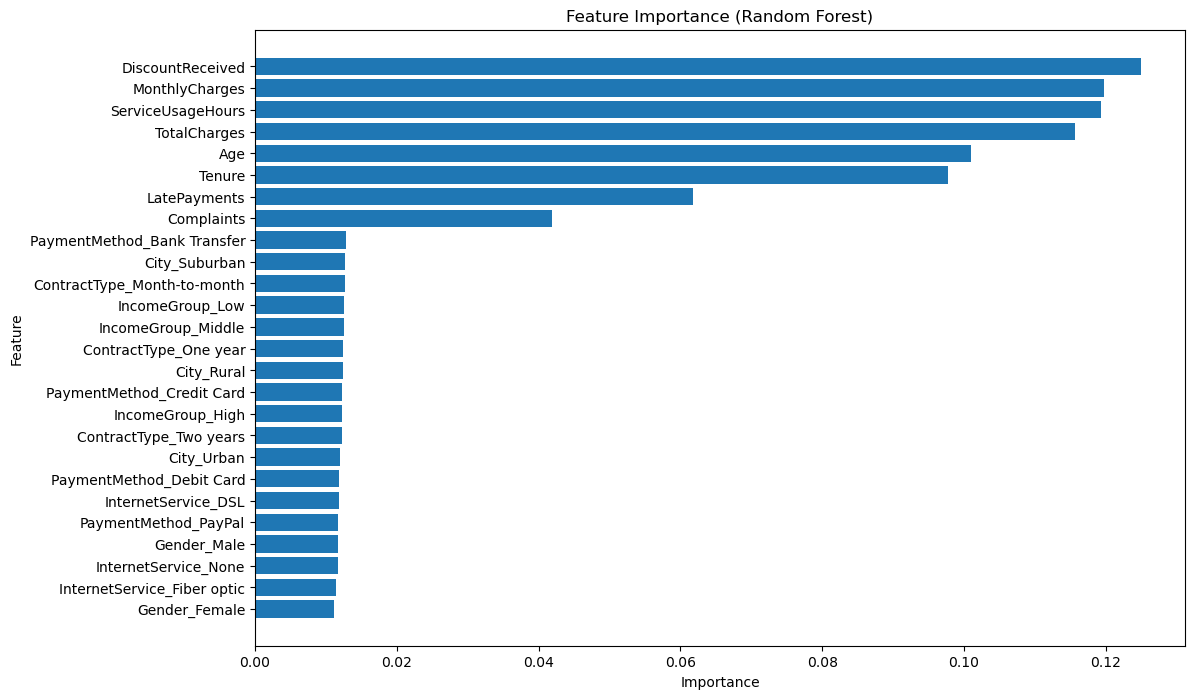

In [11]:
# Extract feature importance from the trained Random Forest model
trained_rf = grid_search.best_estimator_.named_steps["classifier"]

# Get feature names
categorical_feature_names = grid_search.best_estimator_.named_steps["preprocessor"]\
    .transformers_[1][1].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(categorical_feature_names)

# Extract feature importances
importances = trained_rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.gca().invert_yaxis()  # Flip the y-axis for better readability
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
